# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt

## Load Data

In [2]:
X_train, y_train, X_test, y_test = load_data()

num_train = 49000
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

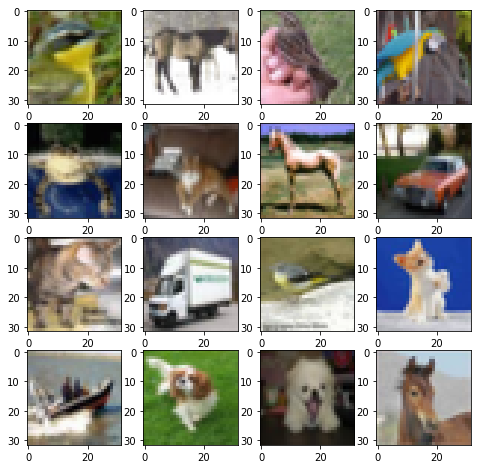

In [3]:
# YOUR CODE HERE
index = np.random.choice(X_train.shape[0], 16, replace=False)
show_x = X_train[index]

show_x = show_x.reshape([16,3,32,32]).transpose((0,2,3,1))

r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = show_x[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [34]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

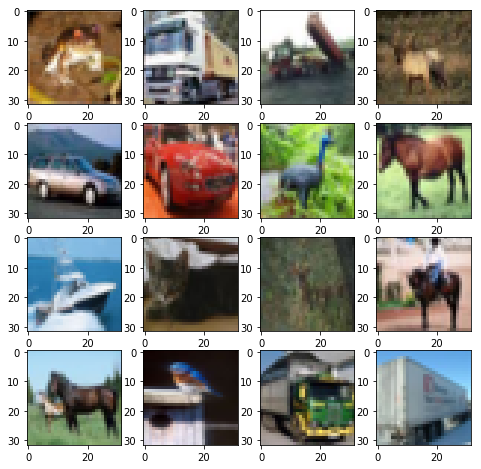

In [25]:
# YOUR CODE HERE
train_set = ImageGenerator(X_train, y_train)
train_set.show()

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

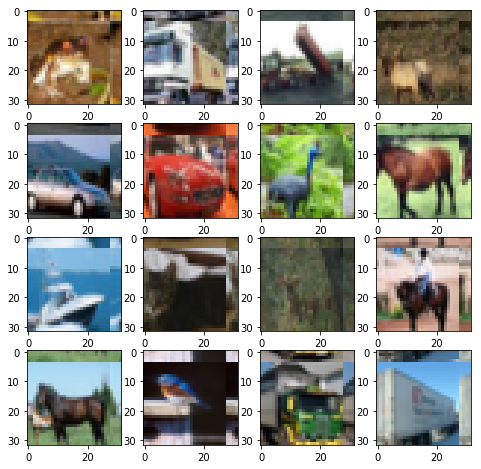

In [11]:
# YOUR CODE HERE
shift_height = 4
shift_width = -4

trans_set = ImageGenerator(X_train, y_train)
trans_set.translate(shift_height, shift_width)

trans_set.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

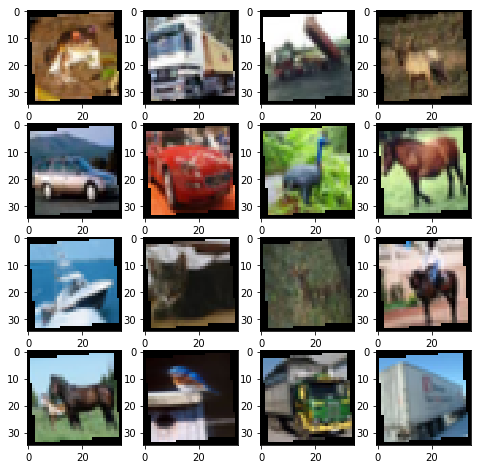

In [12]:
# YOUR CODE HERE
angle = 5

rotate_set = ImageGenerator(X_train, y_train)
rotate_set.rotate(angle)

rotate_set.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

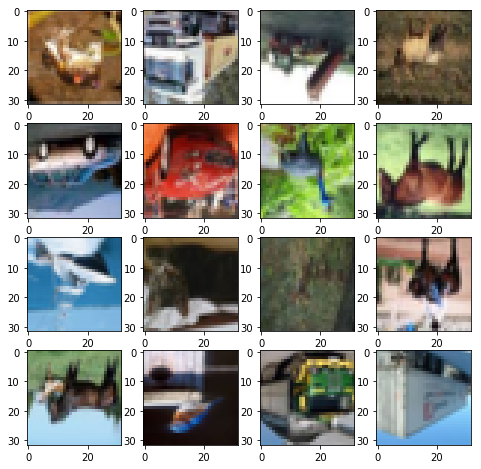

In [13]:
# YOUR CODE HERE
mode = 'v'

flip_set = ImageGenerator(X_train, y_train)
flip_set.flip(mode)

flip_set.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

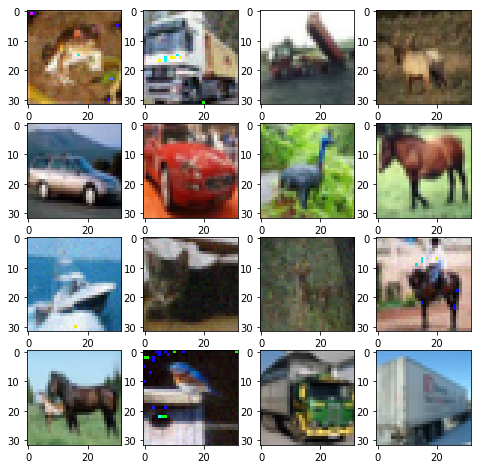

In [28]:
# YOUR CODE HERE
amplitude = 5
portion = 0.5

noise_set = ImageGenerator(X_train, y_train)
noise_set.add_noise(portion, amplitude)

noise_set.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [5]:
# YOUR CODE HERE
import tensorflow as tf
from ecbm4040.neuralnets.cnn import my_training_task4
from ecbm4040.image_generator import ImageGenerator
tf.reset_default_graph()

X_train, y_train = load_data(mode='train')

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
num_training = 49000
num_validation = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape([-1,32,32,3])/255
X_val = X_val.reshape([-1,32,32,3])/255

my_training_task4(X_train, y_train, X_val, y_val, 
        conv_featmap=[6, 16],
        fc_units=[84],
        conv_kernel_size=[3, 3],
        pooling_size=[2, 2],
        l2_norm=0.01,
        seed=235,
        learning_rate=1e-3,
        epoch=10,
        batch_size=245,
        verbose=False,
        pre_trained_model=None)



./data/cifar-10-python.tar.gz already exists. Begin extracting...
Building my LeNet. Parameters: 
conv_featmap=[6, 16]
fc_units=[84]
conv_kernel_size=[3, 3]
pooling_size=[2, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 200
epoch 1 
Best validation accuracy! iteration:100 accuracy: 47.5%
Best validation accuracy! iteration:200 accuracy: 52.5%
epoch 2 
0
Best validation accuracy! iteration:300 accuracy: 54.4%
Best validation accuracy! iteration:400 accuracy: 54.9%
epoch 3 
0
Best validation accuracy! iteration:600 accuracy: 57.5%
epoch 4 
0
epoch 5 
0
Best validation accuracy! iteration:1000 accuracy: 58.2%
epoch 6 
0
epoch 7 
0
Best validation accuracy! iteration:1400 accuracy: 58.4%
epoch 8 
0
epoch 9 
0
epoch 10 
0
Traning ends. The best valid accuracy is 58.4. Model named lenet_1509073424.


In [3]:
# same model without data augmentation for comparison
import tensorflow as tf
from ecbm4040.neuralnets.cnn import my_training
from ecbm4040.image_generator import ImageGenerator
tf.reset_default_graph()

X_train, y_train = load_data(mode='train')

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
num_training = 49000
num_validation = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape([-1,32,32,3])/255
X_val = X_val.reshape([-1,32,32,3])/255

my_training(X_train, y_train, X_val, y_val, 
        conv_featmap=[6, 16],
        fc_units=[84],
        conv_kernel_size=[3, 3],
        pooling_size=[2, 2],
        l2_norm=0.01,
        seed=235,
        learning_rate=1e-3,
        epoch=10,
        batch_size=245,
        verbose=False,
        pre_trained_model=None)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Building my LeNet. Parameters: 
conv_featmap=[6, 16]
fc_units=[84]
conv_kernel_size=[3, 3]
pooling_size=[2, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 200
epoch 1 
Best validation accuracy! iteration:100 accuracy: 47.5%
Best validation accuracy! iteration:200 accuracy: 52.5%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 54.0%
Best validation accuracy! iteration:400 accuracy: 56.4%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 57.4%
Best validation accuracy! iteration:600 accuracy: 57.8%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 59.0%
Best validation accuracy! iteration:800 accuracy: 59.6%
epoch 5 
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 59.8%
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 60.7%
epoch 8 
Best validation accuracy! iteration:1500 accuracy: 61.3%
epoch 9 
epoch 10 
Traning ends. The best valid accura

### Result
    According to the experiment result above, the same model performs slightly better without data augmentation.
    
    (Note that the augmentation here only includes 'translate' and 'horizontal flip' for these two method will generate better accuracy while others will severly degenerate the accuracy.)
    
    Theoratically, when we augment training data with 'similar' transformation of image and while keeping the label the same, it is equal to increase the origin training size. And thus should give us a better accuracy.
    
    However, here the outcome is the opposite. One possible explanation for this phenomena is that the augmentation transformation used here is not close enough to the origin image, which means the transformed images are not similar to origin images and thus are not useful for training the model.  
